### Часть 1. Pix2Pix

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/nlp_made

/content/drive/MyDrive/nlp_made


In [3]:
from tqdm import tqdm
import numpy as np
import torch
from torchvision import datasets, transforms

from models import GeneratorUNet, Discriminator
from utils import show_results, init_normal_weights, set_requires_grad

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
dataset = datasets.ImageFolder('train_facades', transform=transform)
val_dataset = datasets.ImageFolder('val_facades', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=len(val_dataset))

  0%|          | 0/120 [00:00<?, ?it/s]

Epoch 0 of 120 | Loss_GAN: 0.6382, Loss_Pixel: 0.3023, Loss_Generator: 1.4178 | Loss_Discriminator: 0.1152


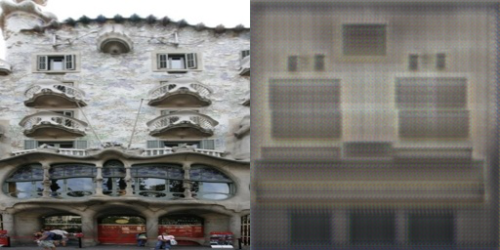

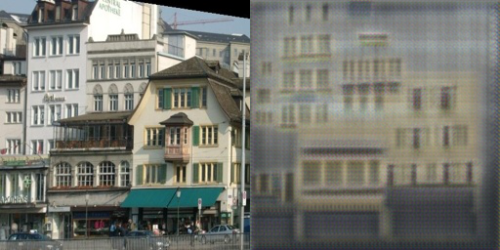

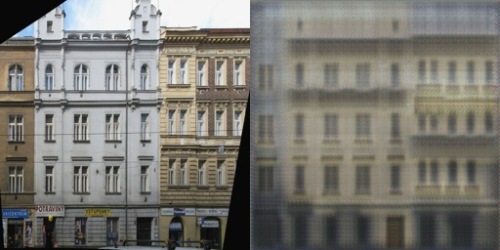

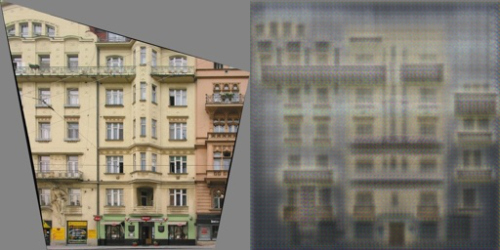

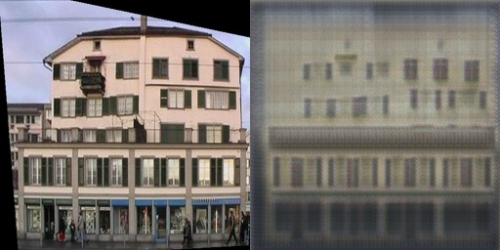

  2%|▏         | 2/120 [01:17<1:15:35, 38.44s/it]

Epoch 1 of 120 | Loss_GAN: 0.7539, Loss_Pixel: 0.3028, Loss_Generator: 1.4302 | Loss_Discriminator: 0.0864


  2%|▎         | 3/120 [01:52<1:11:53, 36.87s/it]

Epoch 2 of 120 | Loss_GAN: 0.6405, Loss_Pixel: 0.2997, Loss_Generator: 1.4063 | Loss_Discriminator: 0.095


  3%|▎         | 4/120 [02:28<1:10:09, 36.29s/it]

Epoch 3 of 120 | Loss_GAN: 0.6606, Loss_Pixel: 0.3, Loss_Generator: 1.4094 | Loss_Discriminator: 0.1355


  4%|▍         | 5/120 [03:03<1:08:39, 35.82s/it]

Epoch 4 of 120 | Loss_GAN: 0.7862, Loss_Pixel: 0.2971, Loss_Generator: 1.4076 | Loss_Discriminator: 0.1645


  5%|▌         | 6/120 [03:38<1:07:42, 35.64s/it]

Epoch 5 of 120 | Loss_GAN: 0.763, Loss_Pixel: 0.2878, Loss_Generator: 1.3638 | Loss_Discriminator: 0.1655


  6%|▌         | 7/120 [04:14<1:07:25, 35.80s/it]

Epoch 6 of 120 | Loss_GAN: 0.8866, Loss_Pixel: 0.2793, Loss_Generator: 1.3367 | Loss_Discriminator: 0.1695


  7%|▋         | 8/120 [04:50<1:06:48, 35.79s/it]

Epoch 7 of 120 | Loss_GAN: 0.6479, Loss_Pixel: 0.264, Loss_Generator: 1.2461 | Loss_Discriminator: 0.1877


  8%|▊         | 9/120 [05:25<1:05:57, 35.65s/it]

Epoch 8 of 120 | Loss_GAN: 1.1683, Loss_Pixel: 0.2937, Loss_Generator: 1.4268 | Loss_Discriminator: 0.314


  8%|▊         | 10/120 [06:01<1:05:14, 35.58s/it]

Epoch 9 of 120 | Loss_GAN: 0.7035, Loss_Pixel: 0.2263, Loss_Generator: 1.0818 | Loss_Discriminator: 0.1817


  9%|▉         | 11/120 [06:37<1:05:01, 35.79s/it]

Epoch 10 of 120 | Loss_GAN: 0.9651, Loss_Pixel: 0.2503, Loss_Generator: 1.2131 | Loss_Discriminator: 0.2621


 10%|█         | 12/120 [07:12<1:04:14, 35.69s/it]

Epoch 11 of 120 | Loss_GAN: 0.9859, Loss_Pixel: 0.2378, Loss_Generator: 1.159 | Loss_Discriminator: 0.3028


 11%|█         | 13/120 [07:47<1:03:20, 35.52s/it]

Epoch 12 of 120 | Loss_GAN: 1.0643, Loss_Pixel: 0.2343, Loss_Generator: 1.15 | Loss_Discriminator: 0.2689


 12%|█▏        | 14/120 [08:23<1:02:31, 35.39s/it]

Epoch 13 of 120 | Loss_GAN: 1.1506, Loss_Pixel: 0.2357, Loss_Generator: 1.1643 | Loss_Discriminator: 0.2552


 12%|█▎        | 15/120 [08:59<1:02:25, 35.67s/it]

Epoch 14 of 120 | Loss_GAN: 1.2306, Loss_Pixel: 0.2405, Loss_Generator: 1.1932 | Loss_Discriminator: 0.2437


 13%|█▎        | 16/120 [09:34<1:01:32, 35.50s/it]

Epoch 15 of 120 | Loss_GAN: 0.7046, Loss_Pixel: 0.2508, Loss_Generator: 1.192 | Loss_Discriminator: 0.1192


 14%|█▍        | 17/120 [10:10<1:01:09, 35.63s/it]

Epoch 16 of 120 | Loss_GAN: 1.0231, Loss_Pixel: 0.2169, Loss_Generator: 1.0682 | Loss_Discriminator: 0.1102


 15%|█▌        | 18/120 [10:45<1:00:30, 35.59s/it]

Epoch 17 of 120 | Loss_GAN: 1.2534, Loss_Pixel: 0.2395, Loss_Generator: 1.1906 | Loss_Discriminator: 0.2267


 16%|█▌        | 19/120 [11:21<1:00:01, 35.66s/it]

Epoch 18 of 120 | Loss_GAN: 0.7283, Loss_Pixel: 0.238, Loss_Generator: 1.1366 | Loss_Discriminator: 0.0877


 17%|█▋        | 20/120 [11:56<58:54, 35.34s/it]  

Epoch 19 of 120 | Loss_GAN: 1.3226, Loss_Pixel: 0.2355, Loss_Generator: 1.1787 | Loss_Discriminator: 0.2667
Epoch 20 of 120 | Loss_GAN: 1.0399, Loss_Pixel: 0.2399, Loss_Generator: 1.1731 | Loss_Discriminator: 0.1568


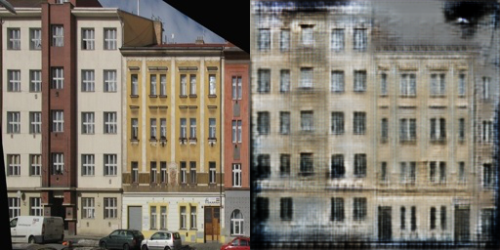

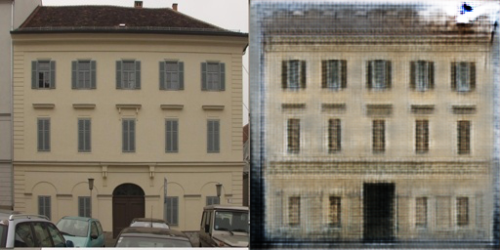

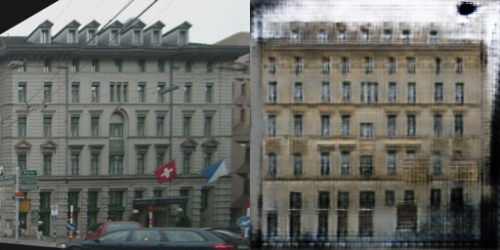

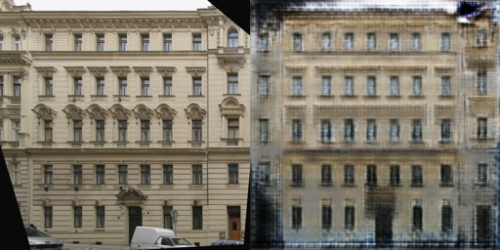

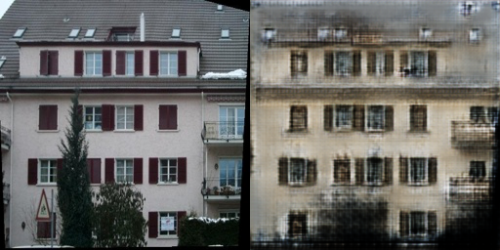

 18%|█▊        | 22/120 [13:10<59:05, 36.18s/it]

Epoch 21 of 120 | Loss_GAN: 0.9985, Loss_Pixel: 0.2154, Loss_Generator: 1.0593 | Loss_Discriminator: 0.0817


 19%|█▉        | 23/120 [13:45<57:47, 35.75s/it]

Epoch 22 of 120 | Loss_GAN: 0.9039, Loss_Pixel: 0.2307, Loss_Generator: 1.1194 | Loss_Discriminator: 0.1


 20%|██        | 24/120 [14:21<57:27, 35.91s/it]

Epoch 23 of 120 | Loss_GAN: 0.7619, Loss_Pixel: 0.2246, Loss_Generator: 1.0794 | Loss_Discriminator: 0.0894


 21%|██        | 25/120 [14:56<56:18, 35.56s/it]

Epoch 24 of 120 | Loss_GAN: 0.6205, Loss_Pixel: 0.2135, Loss_Generator: 1.0164 | Loss_Discriminator: 0.0973


 22%|██▏       | 26/120 [15:31<55:40, 35.54s/it]

Epoch 25 of 120 | Loss_GAN: 0.7124, Loss_Pixel: 0.2226, Loss_Generator: 1.0659 | Loss_Discriminator: 0.131


 22%|██▎       | 27/120 [16:07<55:13, 35.63s/it]

Epoch 26 of 120 | Loss_GAN: 0.5878, Loss_Pixel: 0.2487, Loss_Generator: 1.1719 | Loss_Discriminator: 0.1224


 23%|██▎       | 28/120 [16:44<55:00, 35.87s/it]

Epoch 27 of 120 | Loss_GAN: 0.7965, Loss_Pixel: 0.2139, Loss_Generator: 1.0342 | Loss_Discriminator: 0.0944


 24%|██▍       | 29/120 [17:16<52:34, 34.66s/it]

Epoch 28 of 120 | Loss_GAN: 0.9357, Loss_Pixel: 0.2104, Loss_Generator: 1.0312 | Loss_Discriminator: 0.1297


 25%|██▌       | 30/120 [17:34<44:34, 29.71s/it]

Epoch 29 of 120 | Loss_GAN: 0.9304, Loss_Pixel: 0.2193, Loss_Generator: 1.0708 | Loss_Discriminator: 0.1607


 26%|██▌       | 31/120 [17:52<38:53, 26.22s/it]

Epoch 30 of 120 | Loss_GAN: 0.7886, Loss_Pixel: 0.2062, Loss_Generator: 0.9989 | Loss_Discriminator: 0.2314


 27%|██▋       | 32/120 [18:10<34:53, 23.79s/it]

Epoch 31 of 120 | Loss_GAN: 1.0168, Loss_Pixel: 0.2105, Loss_Generator: 1.0389 | Loss_Discriminator: 0.1749


 28%|██▊       | 33/120 [18:28<32:00, 22.07s/it]

Epoch 32 of 120 | Loss_GAN: 0.7776, Loss_Pixel: 0.2201, Loss_Generator: 1.0604 | Loss_Discriminator: 0.2487


 28%|██▊       | 34/120 [18:46<29:52, 20.84s/it]

Epoch 33 of 120 | Loss_GAN: 0.7921, Loss_Pixel: 0.1956, Loss_Generator: 0.9515 | Loss_Discriminator: 0.1712


 29%|██▉       | 35/120 [19:04<28:25, 20.06s/it]

Epoch 34 of 120 | Loss_GAN: 0.6807, Loss_Pixel: 0.2094, Loss_Generator: 1.0034 | Loss_Discriminator: 0.1394


 30%|███       | 36/120 [19:22<27:11, 19.43s/it]

Epoch 35 of 120 | Loss_GAN: 0.7208, Loss_Pixel: 0.2024, Loss_Generator: 0.9755 | Loss_Discriminator: 0.1956


 31%|███       | 37/120 [19:40<26:16, 19.00s/it]

Epoch 36 of 120 | Loss_GAN: 0.6832, Loss_Pixel: 0.2276, Loss_Generator: 1.0858 | Loss_Discriminator: 0.1463


 32%|███▏      | 38/120 [19:58<25:37, 18.75s/it]

Epoch 37 of 120 | Loss_GAN: 1.4713, Loss_Pixel: 0.2145, Loss_Generator: 1.0978 | Loss_Discriminator: 0.374


 32%|███▎      | 39/120 [20:16<25:04, 18.58s/it]

Epoch 38 of 120 | Loss_GAN: 0.5129, Loss_Pixel: 0.2103, Loss_Generator: 0.9927 | Loss_Discriminator: 0.1218


 33%|███▎      | 40/120 [20:34<24:33, 18.42s/it]

Epoch 39 of 120 | Loss_GAN: 1.0567, Loss_Pixel: 0.2108, Loss_Generator: 1.0438 | Loss_Discriminator: 0.1719
Epoch 40 of 120 | Loss_GAN: 0.842, Loss_Pixel: 0.1984, Loss_Generator: 0.9688 | Loss_Discriminator: 0.1578


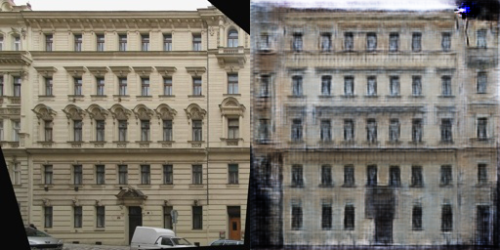

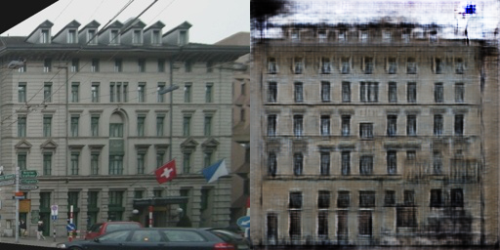

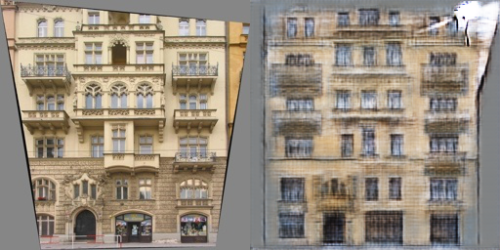

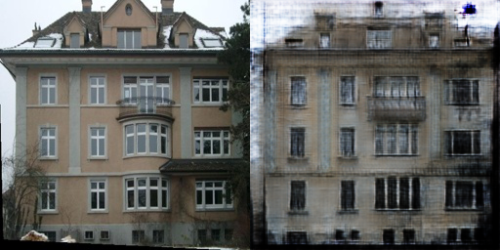

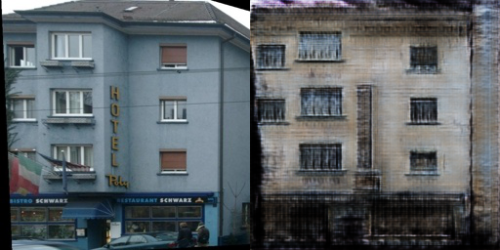

 35%|███▌      | 42/120 [21:12<24:10, 18.60s/it]

Epoch 41 of 120 | Loss_GAN: 0.7252, Loss_Pixel: 0.1927, Loss_Generator: 0.9325 | Loss_Discriminator: 0.0799


 36%|███▌      | 43/120 [21:30<23:35, 18.38s/it]

Epoch 42 of 120 | Loss_GAN: 0.3947, Loss_Pixel: 0.215, Loss_Generator: 1.0029 | Loss_Discriminator: 0.1062


 37%|███▋      | 44/120 [21:48<23:03, 18.20s/it]

Epoch 43 of 120 | Loss_GAN: 0.4879, Loss_Pixel: 0.1976, Loss_Generator: 0.9331 | Loss_Discriminator: 0.1107


 38%|███▊      | 45/120 [22:06<22:38, 18.11s/it]

Epoch 44 of 120 | Loss_GAN: 0.5982, Loss_Pixel: 0.201, Loss_Generator: 0.9583 | Loss_Discriminator: 0.0806


 38%|███▊      | 46/120 [22:24<22:14, 18.04s/it]

Epoch 45 of 120 | Loss_GAN: 0.543, Loss_Pixel: 0.1849, Loss_Generator: 0.8808 | Loss_Discriminator: 0.1073


 39%|███▉      | 47/120 [22:41<21:51, 17.96s/it]

Epoch 46 of 120 | Loss_GAN: 0.985, Loss_Pixel: 0.2026, Loss_Generator: 1.0004 | Loss_Discriminator: 0.098


 40%|████      | 48/120 [22:59<21:29, 17.92s/it]

Epoch 47 of 120 | Loss_GAN: 0.9907, Loss_Pixel: 0.1928, Loss_Generator: 0.9569 | Loss_Discriminator: 0.0883


 41%|████      | 49/120 [23:17<21:09, 17.89s/it]

Epoch 48 of 120 | Loss_GAN: 0.3851, Loss_Pixel: 0.1889, Loss_Generator: 0.8846 | Loss_Discriminator: 0.114


 42%|████▏     | 50/120 [23:35<20:51, 17.88s/it]

Epoch 49 of 120 | Loss_GAN: 0.7794, Loss_Pixel: 0.1904, Loss_Generator: 0.927 | Loss_Discriminator: 0.0994


 42%|████▎     | 51/120 [23:53<20:34, 17.89s/it]

Epoch 50 of 120 | Loss_GAN: 0.816, Loss_Pixel: 0.2047, Loss_Generator: 0.9944 | Loss_Discriminator: 0.039


 43%|████▎     | 52/120 [24:11<20:20, 17.95s/it]

Epoch 51 of 120 | Loss_GAN: 0.7559, Loss_Pixel: 0.1941, Loss_Generator: 0.9413 | Loss_Discriminator: 0.078


 44%|████▍     | 53/120 [24:29<20:05, 17.99s/it]

Epoch 52 of 120 | Loss_GAN: 1.1672, Loss_Pixel: 0.2186, Loss_Generator: 1.0886 | Loss_Discriminator: 0.1189


 45%|████▌     | 54/120 [24:47<19:45, 17.97s/it]

Epoch 53 of 120 | Loss_GAN: 1.0918, Loss_Pixel: 0.1759, Loss_Generator: 0.89 | Loss_Discriminator: 0.06


 46%|████▌     | 55/120 [25:05<19:27, 17.95s/it]

Epoch 54 of 120 | Loss_GAN: 0.9709, Loss_Pixel: 0.1848, Loss_Generator: 0.9188 | Loss_Discriminator: 0.037


 47%|████▋     | 56/120 [25:23<19:07, 17.94s/it]

Epoch 55 of 120 | Loss_GAN: 0.7786, Loss_Pixel: 0.1841, Loss_Generator: 0.8984 | Loss_Discriminator: 0.0808


 48%|████▊     | 57/120 [25:41<18:47, 17.89s/it]

Epoch 56 of 120 | Loss_GAN: 0.9202, Loss_Pixel: 0.1802, Loss_Generator: 0.8936 | Loss_Discriminator: 0.0323


 48%|████▊     | 58/120 [25:58<18:30, 17.91s/it]

Epoch 57 of 120 | Loss_GAN: 0.8144, Loss_Pixel: 0.1794, Loss_Generator: 0.8808 | Loss_Discriminator: 0.0537


 49%|████▉     | 59/120 [26:16<18:11, 17.90s/it]

Epoch 58 of 120 | Loss_GAN: 0.5, Loss_Pixel: 0.1912, Loss_Generator: 0.9054 | Loss_Discriminator: 0.0545


 50%|█████     | 60/120 [26:34<17:54, 17.91s/it]

Epoch 59 of 120 | Loss_GAN: 1.1704, Loss_Pixel: 0.1832, Loss_Generator: 0.9299 | Loss_Discriminator: 0.1192
Epoch 60 of 120 | Loss_GAN: 1.089, Loss_Pixel: 0.1866, Loss_Generator: 0.9377 | Loss_Discriminator: 0.0365


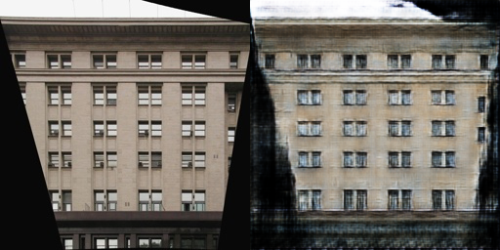

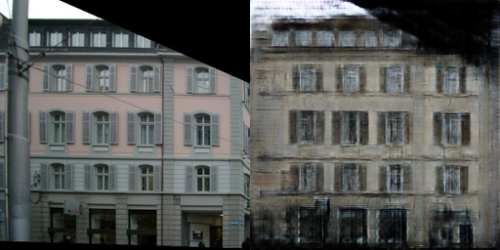

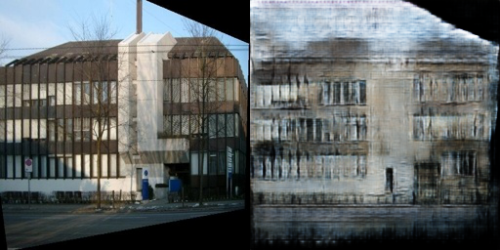

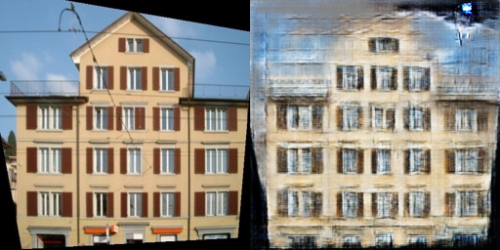

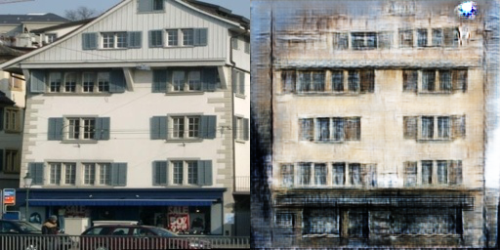

 52%|█████▏    | 62/120 [27:12<17:39, 18.27s/it]

Epoch 61 of 120 | Loss_GAN: 0.8052, Loss_Pixel: 0.2019, Loss_Generator: 0.981 | Loss_Discriminator: 0.046


 52%|█████▎    | 63/120 [27:30<17:21, 18.28s/it]

Epoch 62 of 120 | Loss_GAN: 1.3063, Loss_Pixel: 0.1958, Loss_Generator: 0.9986 | Loss_Discriminator: 0.0803


 53%|█████▎    | 64/120 [27:48<17:03, 18.28s/it]

Epoch 63 of 120 | Loss_GAN: 0.804, Loss_Pixel: 0.1849, Loss_Generator: 0.9044 | Loss_Discriminator: 0.0566


 54%|█████▍    | 65/120 [28:07<16:43, 18.25s/it]

Epoch 64 of 120 | Loss_GAN: 0.9399, Loss_Pixel: 0.1827, Loss_Generator: 0.9066 | Loss_Discriminator: 0.049


 55%|█████▌    | 66/120 [28:25<16:24, 18.24s/it]

Epoch 65 of 120 | Loss_GAN: 0.552, Loss_Pixel: 0.1788, Loss_Generator: 0.8543 | Loss_Discriminator: 0.0693


 56%|█████▌    | 67/120 [28:43<16:05, 18.22s/it]

Epoch 66 of 120 | Loss_GAN: 0.7799, Loss_Pixel: 0.1679, Loss_Generator: 0.8255 | Loss_Discriminator: 0.067


 57%|█████▋    | 68/120 [29:01<15:47, 18.22s/it]

Epoch 67 of 120 | Loss_GAN: 0.9325, Loss_Pixel: 0.1792, Loss_Generator: 0.8905 | Loss_Discriminator: 0.0238


 57%|█████▊    | 69/120 [29:19<15:28, 18.21s/it]

Epoch 68 of 120 | Loss_GAN: 1.0289, Loss_Pixel: 0.1941, Loss_Generator: 0.9662 | Loss_Discriminator: 0.0598


 58%|█████▊    | 70/120 [29:37<15:07, 18.15s/it]

Epoch 69 of 120 | Loss_GAN: 1.475, Loss_Pixel: 0.1633, Loss_Generator: 0.8678 | Loss_Discriminator: 0.1018


 59%|█████▉    | 71/120 [29:55<14:48, 18.13s/it]

Epoch 70 of 120 | Loss_GAN: 0.4507, Loss_Pixel: 0.1754, Loss_Generator: 0.8297 | Loss_Discriminator: 0.0691


 60%|██████    | 72/120 [30:14<14:29, 18.12s/it]

Epoch 71 of 120 | Loss_GAN: 1.2809, Loss_Pixel: 0.1728, Loss_Generator: 0.8927 | Loss_Discriminator: 0.1465


 61%|██████    | 73/120 [30:32<14:12, 18.13s/it]

Epoch 72 of 120 | Loss_GAN: 0.7896, Loss_Pixel: 0.1792, Loss_Generator: 0.8774 | Loss_Discriminator: 0.0294


 62%|██████▏   | 74/120 [30:50<13:57, 18.20s/it]

Epoch 73 of 120 | Loss_GAN: 0.8127, Loss_Pixel: 0.1648, Loss_Generator: 0.8147 | Loss_Discriminator: 0.0308


 62%|██████▎   | 75/120 [31:08<13:39, 18.22s/it]

Epoch 74 of 120 | Loss_GAN: 0.9269, Loss_Pixel: 0.157, Loss_Generator: 0.7898 | Loss_Discriminator: 0.0204


 63%|██████▎   | 76/120 [31:27<13:21, 18.22s/it]

Epoch 75 of 120 | Loss_GAN: 0.7036, Loss_Pixel: 0.1829, Loss_Generator: 0.8865 | Loss_Discriminator: 0.0421


 64%|██████▍   | 77/120 [31:45<13:02, 18.21s/it]

Epoch 76 of 120 | Loss_GAN: 0.865, Loss_Pixel: 0.169, Loss_Generator: 0.8382 | Loss_Discriminator: 0.0215


 65%|██████▌   | 78/120 [32:03<12:45, 18.22s/it]

Epoch 77 of 120 | Loss_GAN: 1.1128, Loss_Pixel: 0.1674, Loss_Generator: 0.8535 | Loss_Discriminator: 0.0964


 66%|██████▌   | 79/120 [32:21<12:27, 18.23s/it]

Epoch 78 of 120 | Loss_GAN: 0.9705, Loss_Pixel: 0.1859, Loss_Generator: 0.9237 | Loss_Discriminator: 0.0297


 67%|██████▋   | 80/120 [32:40<12:10, 18.25s/it]

Epoch 79 of 120 | Loss_GAN: 1.0921, Loss_Pixel: 0.1771, Loss_Generator: 0.8954 | Loss_Discriminator: 0.0542
Epoch 80 of 120 | Loss_GAN: 1.1885, Loss_Pixel: 0.162, Loss_Generator: 0.8358 | Loss_Discriminator: 0.0644


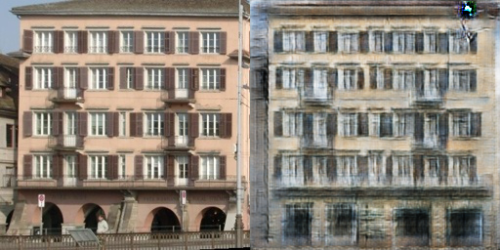

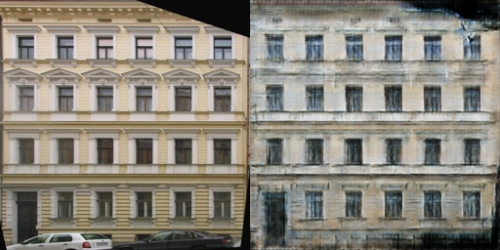

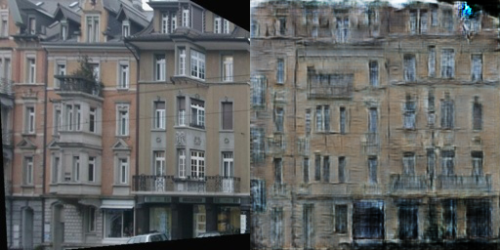

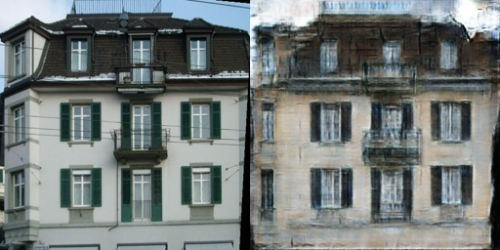

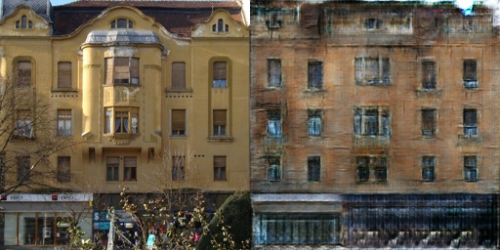

 68%|██████▊   | 82/120 [33:17<11:40, 18.44s/it]

Epoch 81 of 120 | Loss_GAN: 0.5684, Loss_Pixel: 0.1668, Loss_Generator: 0.8018 | Loss_Discriminator: 0.0515


 69%|██████▉   | 83/120 [33:35<11:18, 18.33s/it]

Epoch 82 of 120 | Loss_GAN: 0.9096, Loss_Pixel: 0.1734, Loss_Generator: 0.8622 | Loss_Discriminator: 0.0208


 70%|███████   | 84/120 [33:53<10:56, 18.24s/it]

Epoch 83 of 120 | Loss_GAN: 1.1069, Loss_Pixel: 0.1902, Loss_Generator: 0.9553 | Loss_Discriminator: 0.0379


 71%|███████   | 85/120 [34:11<10:34, 18.13s/it]

Epoch 84 of 120 | Loss_GAN: 0.7169, Loss_Pixel: 0.1694, Loss_Generator: 0.827 | Loss_Discriminator: 0.0252


 72%|███████▏  | 86/120 [34:29<10:14, 18.06s/it]

Epoch 85 of 120 | Loss_GAN: 1.2499, Loss_Pixel: 0.1615, Loss_Generator: 0.8391 | Loss_Discriminator: 0.0476


 72%|███████▎  | 87/120 [34:47<09:54, 18.03s/it]

Epoch 86 of 120 | Loss_GAN: 0.5553, Loss_Pixel: 0.1618, Loss_Generator: 0.7783 | Loss_Discriminator: 0.0443


 73%|███████▎  | 88/120 [35:05<09:34, 17.97s/it]

Epoch 87 of 120 | Loss_GAN: 1.1935, Loss_Pixel: 0.1665, Loss_Generator: 0.8566 | Loss_Discriminator: 0.0313


 74%|███████▍  | 89/120 [35:23<09:16, 17.94s/it]

Epoch 88 of 120 | Loss_GAN: 0.8626, Loss_Pixel: 0.1726, Loss_Generator: 0.8542 | Loss_Discriminator: 0.0232


 75%|███████▌  | 90/120 [35:40<08:57, 17.90s/it]

Epoch 89 of 120 | Loss_GAN: 1.0487, Loss_Pixel: 0.1578, Loss_Generator: 0.8045 | Loss_Discriminator: 0.0234


 76%|███████▌  | 91/120 [35:58<08:39, 17.90s/it]

Epoch 90 of 120 | Loss_GAN: 1.3287, Loss_Pixel: 0.1608, Loss_Generator: 0.8434 | Loss_Discriminator: 0.0555


 77%|███████▋  | 92/120 [36:16<08:20, 17.88s/it]

Epoch 91 of 120 | Loss_GAN: 1.0382, Loss_Pixel: 0.1622, Loss_Generator: 0.8235 | Loss_Discriminator: 0.0576


 78%|███████▊  | 93/120 [36:34<08:03, 17.89s/it]

Epoch 92 of 120 | Loss_GAN: 1.1664, Loss_Pixel: 0.161, Loss_Generator: 0.8294 | Loss_Discriminator: 0.0155


 78%|███████▊  | 94/120 [36:52<07:45, 17.89s/it]

Epoch 93 of 120 | Loss_GAN: 0.7828, Loss_Pixel: 0.1575, Loss_Generator: 0.779 | Loss_Discriminator: 0.0217


 79%|███████▉  | 95/120 [37:10<07:27, 17.88s/it]

Epoch 94 of 120 | Loss_GAN: 1.3521, Loss_Pixel: 0.166, Loss_Generator: 0.8688 | Loss_Discriminator: 0.1017


 80%|████████  | 96/120 [37:28<07:08, 17.86s/it]

Epoch 95 of 120 | Loss_GAN: 1.0026, Loss_Pixel: 0.1619, Loss_Generator: 0.8188 | Loss_Discriminator: 0.0196


 81%|████████  | 97/120 [37:46<06:51, 17.89s/it]

Epoch 96 of 120 | Loss_GAN: 0.8047, Loss_Pixel: 0.1685, Loss_Generator: 0.8305 | Loss_Discriminator: 0.0177


 82%|████████▏ | 98/120 [38:03<06:32, 17.86s/it]

Epoch 97 of 120 | Loss_GAN: 1.4259, Loss_Pixel: 0.157, Loss_Generator: 0.835 | Loss_Discriminator: 0.0465


 82%|████████▎ | 99/120 [38:21<06:14, 17.84s/it]

Epoch 98 of 120 | Loss_GAN: 1.0054, Loss_Pixel: 0.1577, Loss_Generator: 0.8003 | Loss_Discriminator: 0.0145


 83%|████████▎ | 100/120 [38:39<05:56, 17.83s/it]

Epoch 99 of 120 | Loss_GAN: 0.8339, Loss_Pixel: 0.1642, Loss_Generator: 0.8141 | Loss_Discriminator: 0.0301
Epoch 100 of 120 | Loss_GAN: 0.9507, Loss_Pixel: 0.1603, Loss_Generator: 0.8069 | Loss_Discriminator: 0.0139


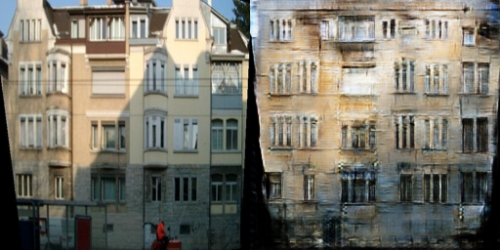

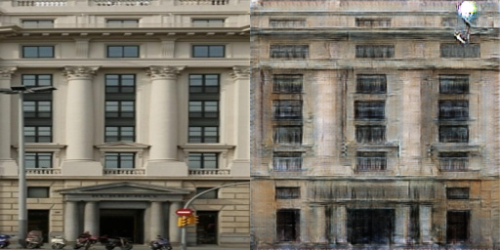

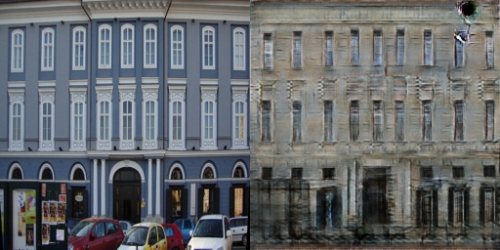

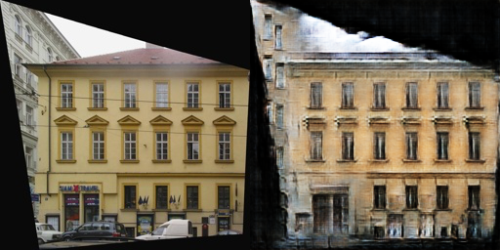

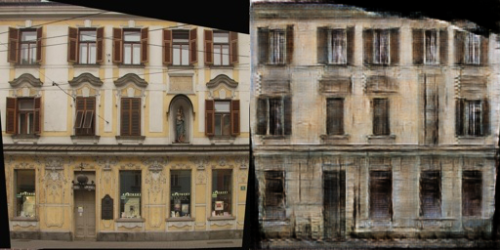

 85%|████████▌ | 102/120 [39:17<05:29, 18.33s/it]

Epoch 101 of 120 | Loss_GAN: 0.8245, Loss_Pixel: 0.1601, Loss_Generator: 0.7947 | Loss_Discriminator: 0.0175


 86%|████████▌ | 103/120 [39:35<05:11, 18.34s/it]

Epoch 102 of 120 | Loss_GAN: 0.8211, Loss_Pixel: 0.1558, Loss_Generator: 0.775 | Loss_Discriminator: 0.0374


 87%|████████▋ | 104/120 [39:54<04:53, 18.35s/it]

Epoch 103 of 120 | Loss_GAN: 1.2255, Loss_Pixel: 0.1504, Loss_Generator: 0.7872 | Loss_Discriminator: 0.0328


 88%|████████▊ | 105/120 [40:12<04:34, 18.32s/it]

Epoch 104 of 120 | Loss_GAN: 1.021, Loss_Pixel: 0.163, Loss_Generator: 0.8253 | Loss_Discriminator: 0.0153


 88%|████████▊ | 106/120 [40:30<04:16, 18.29s/it]

Epoch 105 of 120 | Loss_GAN: 1.1008, Loss_Pixel: 0.1767, Loss_Generator: 0.8943 | Loss_Discriminator: 0.0319


 89%|████████▉ | 107/120 [40:49<04:00, 18.52s/it]

Epoch 106 of 120 | Loss_GAN: 1.3139, Loss_Pixel: 0.1637, Loss_Generator: 0.8551 | Loss_Discriminator: 0.0398


 90%|█████████ | 108/120 [41:07<03:41, 18.50s/it]

Epoch 107 of 120 | Loss_GAN: 1.2201, Loss_Pixel: 0.1538, Loss_Generator: 0.802 | Loss_Discriminator: 0.0349


 91%|█████████ | 109/120 [41:26<03:22, 18.45s/it]

Epoch 108 of 120 | Loss_GAN: 0.833, Loss_Pixel: 0.1604, Loss_Generator: 0.7968 | Loss_Discriminator: 0.0131


 92%|█████████▏| 110/120 [41:44<03:03, 18.39s/it]

Epoch 109 of 120 | Loss_GAN: 0.9319, Loss_Pixel: 0.1502, Loss_Generator: 0.7598 | Loss_Discriminator: 0.0123


 92%|█████████▎| 111/120 [42:02<02:45, 18.39s/it]

Epoch 110 of 120 | Loss_GAN: 1.1411, Loss_Pixel: 0.1574, Loss_Generator: 0.8108 | Loss_Discriminator: 0.0218


 93%|█████████▎| 112/120 [42:21<02:26, 18.37s/it]

Epoch 111 of 120 | Loss_GAN: 1.0895, Loss_Pixel: 0.1514, Loss_Generator: 0.7795 | Loss_Discriminator: 0.0223


 94%|█████████▍| 113/120 [42:39<02:08, 18.37s/it]

Epoch 112 of 120 | Loss_GAN: 1.4984, Loss_Pixel: 0.1557, Loss_Generator: 0.8357 | Loss_Discriminator: 0.074


 95%|█████████▌| 114/120 [42:58<01:50, 18.39s/it]

Epoch 113 of 120 | Loss_GAN: 0.9736, Loss_Pixel: 0.1478, Loss_Generator: 0.7527 | Loss_Discriminator: 0.0246


 96%|█████████▌| 115/120 [43:16<01:31, 18.35s/it]

Epoch 114 of 120 | Loss_GAN: 0.8733, Loss_Pixel: 0.1626, Loss_Generator: 0.8105 | Loss_Discriminator: 0.0288


 97%|█████████▋| 116/120 [43:34<01:13, 18.30s/it]

Epoch 115 of 120 | Loss_GAN: 0.9986, Loss_Pixel: 0.1514, Loss_Generator: 0.7714 | Loss_Discriminator: 0.0143


 98%|█████████▊| 117/120 [43:53<00:55, 18.37s/it]

Epoch 116 of 120 | Loss_GAN: 0.7747, Loss_Pixel: 0.1597, Loss_Generator: 0.7885 | Loss_Discriminator: 0.0219


 98%|█████████▊| 118/120 [44:11<00:36, 18.43s/it]

Epoch 117 of 120 | Loss_GAN: 1.105, Loss_Pixel: 0.1516, Loss_Generator: 0.7816 | Loss_Discriminator: 0.0221


 99%|█████████▉| 119/120 [44:29<00:18, 18.39s/it]

Epoch 118 of 120 | Loss_GAN: 1.005, Loss_Pixel: 0.1448, Loss_Generator: 0.7421 | Loss_Discriminator: 0.022


100%|██████████| 120/120 [44:48<00:00, 22.40s/it]

Epoch 119 of 120 | Loss_GAN: 1.0047, Loss_Pixel: 0.1538, Loss_Generator: 0.7823 | Loss_Discriminator: 0.0207


In [5]:
nepochs = 120
mask_border = 256
lr_generator = 3e-4
lr_discriminator = 2e-4
alpha = 0.09
pixel_coeff = 50
discriminator_coeff = 0.5


generator = GeneratorUNet()
generator = generator.to(device)
generator.apply(init_normal_weights)
discriminator = Discriminator()
discriminator = discriminator.to(device)
discriminator.apply(init_normal_weights)


criterion_GAN = torch.nn.MSELoss().to(device)
criterion_pixelwise = torch.nn.L1Loss().to(device)
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr_generator, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr_discriminator, betas=(0.5, 0.999))


for epoch in tqdm(range(nepochs)):
    for i, batch in enumerate(dataloader):
        real_A = batch[0][:, :, :, mask_border:].to(device)
        real_B = batch[0][:, :, :, :mask_border].to(device)
        valid = torch.tensor(np.ones((real_A.size(0), 1, 16, 16)), dtype=torch.float).to(device)
        fake = torch.tensor(np.zeros((real_A.size(0), 1, 16, 16)), dtype=torch.float).to(device)

        optimizer_G.zero_grad()
        fake_B = generator(real_A)
        pred_fake = discriminator(fake_B, real_A)

        # GAN loss
        loss_GAN = criterion_GAN(pred_fake, valid)

        # Pixel loss
        loss_pixel = criterion_pixelwise(fake_B, real_B)

        # Generator loss
        loss_G = alpha * loss_GAN + alpha * pixel_coeff * loss_pixel
        loss_G.backward()
        set_requires_grad(discriminator, False)
        optimizer_G.step()

        # Discriminator loss
        set_requires_grad(discriminator, True)
        optimizer_D.zero_grad()
        pred_real = discriminator(real_B, real_A)
        loss_real = criterion_GAN(pred_real, valid)
        pred_fake = discriminator(fake_B.detach(), real_A)
        loss_fake = criterion_GAN(pred_fake, fake)
        loss_D = discriminator_coeff * (loss_real + loss_fake)
        loss_D.backward()
        optimizer_D.step()

    print(f"Epoch {epoch} of {nepochs} | Loss_GAN: {round(loss_GAN.item(), 4)}, Loss_Pixel: {round(loss_pixel.item(), 4)}, Loss_Generator: {round(loss_G.item(), 4)} | Loss_Discriminator: {round(loss_D.item(), 4)}")

    if epoch % 20 == 0:
        imgs = next(iter(val_dataloader))
        ix = np.random.randint(0, len(val_dataset), 5).tolist()
        real_A = imgs[0][ix, :, :, mask_border:].to(device)
        real_B = imgs[0][ix, :, :, :mask_border]
        show_results(real_B, generator(real_A).to(torch.device("cpu")))